<a href="https://colab.research.google.com/github/yeong0000/Python/blob/main/ml04_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning(기계 학습)

사람의 지도가 필요한 지 여부에 따라서
*  지도 학습(supervised learning): 레이블이 있는 데이터를 학습.
    *  분류(classification): 클래스(카테고리)를 분류.
        *  예: 도미-빙어, setosa-versicolor-virginica, ...
    *  회귀(regression): 숫자를 예측.
        *  예: 주가 예측, 집값 예측, ...
*  비지도 학습(unsupervised learning): 레이블이 없는 데이터를 학습.


#  문제 정의

fish 데이터 셋에서 물고기의 무게(Weight)를 물고기의 다른 특성을 이용해서 예측.

*  Perch(농어)의 무게 예측
    *  무게를 길이만으로 예측: Weight(종속변수) ~ Length(독립변수)
    *  무게를 다른 모든 특성들을 사용해서 예측: Weight ~ Length + Diagonal + Height + Width

*  용어:
    *  예측하고자 하는 값: 타겟, 레이블, 관심 변수, 종속 변수
    *  예측하기 위해서 필요한 값(변수): 특성(feature), 독립 변수

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # KNN 알고리즘을 사용한 수치 예측.


# 데이터 준비

In [2]:
# CSV 파일 경로
fish_csv = 'https://github.com/JakeOh/20230228_itwill_java140_lab_python/raw/main/fish.csv'

In [3]:
# CSV 파일을 읽어서 DataFrame을 생성
fish_df = pd.read_csv(fish_csv)

In [4]:
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
# fish_df에서 'Perch' 어종만 선택:
perch = fish_df[fish_df.Species == 'Perch']

In [6]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [7]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [8]:
# X: 특성 (2차원) 배열. 길이만 선택. (n_samples, n_features) = (56, 1)
X = perch[['Length']].values

# y: 타겟 (1차원) 배열. 레이블. 무게. (n_samples,) = (56,)
y = perch['Weight'].values

In [9]:
X.shape

(56, 1)

In [10]:
y.shape

(56,)

# 훈련 셋(75%), 테스트 셋(25%) 분리

In [11]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)
# random sampling(임의 추출)

In [12]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 1), (14, 1), (42,), (14,))

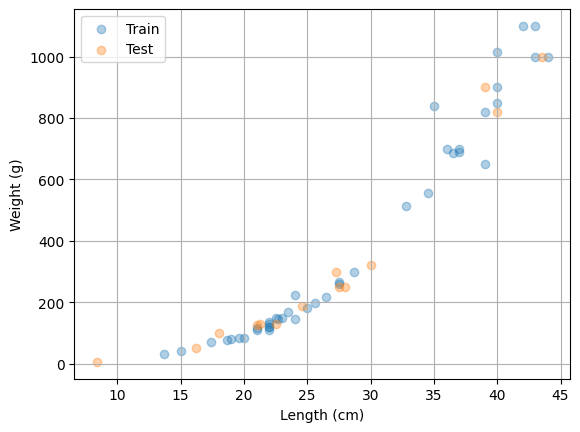

In [13]:
# 훈련 셋 시각화(Weight ~ Length)
plt.scatter(x=X_tr.ravel(), y=y_tr, label='Train', alpha=0.35)

# 테스트 셋 시각화
plt.scatter(x=X_te.ravel(), y=y_te, label='Test', alpha=0.35)

plt.legend()
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')

plt.show()

# KNN Regressor 모델 훈련, 평가

1. KNN Regressor 객체 생성(생성자 호출)
1. KNN Regressor 훈련 셋으로 학습시킴(fit)
1. 훈련 셋의 예측값 계산(predict), 실젯값과 비교
1. 테스트 셋의 예측값 계산, 실젯값과 비교
